# GRSW simulations notebook

This notebook shows how to access the summary table of the simulations data compiled for the GRSW workshop.
It require to pull a python package to access easily the data stored on [DACE](https://dace.unige.ch/dashboard/)

### Importing useful functions

First we need to import the function needed for the notebook

In [72]:
import os
import sys
from pathlib import Path
import pandas as pd
# add the parent directory to the path so we can import the module
parent_of_current_working_directory = Path(os.getcwd()).resolve().parent
sys.path.insert(0, parent_of_current_working_directory.as_posix())
from src.ResonantState.data_download import get_metadata_simulations, download_samples

We can download the metatable to have a look on the available observations samples

In [73]:
dataframe_simulations = get_metadata_simulations()
dataframe_simulations.head()

,planet_name,star_name,run_ID,System_ID,contact_mail,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,radius_star_r_sun,...,longitude_of_ascending_node_deg,nb_planets,simulation_type,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
0,0,NaN,01,0001,sarehataiee@um.ac.ir,463.117828,0.0,9.988382,1.0,1.0,...,0.0,2,hydrodynamical_simulation,2021A&A...648A..69A,2000A&AS..141..165M,"2D, cavity model, 6:5 MMR, higher temporal res...",https://dace.unige.ch/downloads/resonant_state...,NaN,NaN,https://dace.unige.ch/downloads/resonant_state...
1,1,NaN,01,0001,sarehataiee@um.ac.ir,556.236617,0.0,9.988382,1.0,1.0,...,0.0,2,hydrodynamical_simulation,2021A&A...648A..69A,2000A&AS..141..165M,"2D, cavity model, 6:5 MMR, higher temporal res...",https://dace.unige.ch/downloads/resonant_state...,NaN,NaN,https://dace.unige.ch/downloads/resonant_state...
2,0,NaN,01,0002,sarehataiee@um.ac.ir,452.225320,0.0,9.988382,1.0,1.0,...,0.0,2,hydrodynamical_simulation,2021A&A...648A..69A,2000A&AS..141..165M,"2D, cavity model, 4:3 MMR, higher temporal res...",https://dace.unige.ch/downloads/resonant_state...,NaN,NaN,https://dace.unige.ch/downloads/resonant_state...
3,1,NaN,01,0002,sarehataiee@um.ac.ir,602.585616,0.0,19.976764,1.0,1.0,...,0.0,2,hydrodynamical_simulation,2021A&A...648A..69A,2000A&AS..141..165M,"2D, cavity model, 4:3 MMR, higher temporal res...",https://dace.unige.ch/downloads/resonant_state...,NaN,NaN,https://dace.unige.ch/downloads/resonant_state...
4,0,NaN,01,0002hs,sarehataiee@um.ac.ir,447.838070,0.0,9.988382,1.0,1.0,...,0.0,2,hydrodynamical_simulation,2021A&A...648A..69A,2000A&AS..141..165M,"2D, cavity model massive disc, 4:3 MMR, higher...",https://dace.unige.ch/downloads/resonant_state...,NaN,NaN,https://dace.unige.ch/downloads/resonant_state...


We can have a look on the available columns:

In [74]:
dataframe_simulations.head(0).T

""
planet_name
star_name
run_ID
System_ID
contact_mail
period_days
radius_planet_r_earth
mass_planet_m_earth
mass_star_m_sun
radius_star_r_sun


Let's keep the compact system with planets with periods of less that 100 days

count    2832.000000
mean       25.474524
std        24.919383
min         0.872574
25%         7.562215
50%        16.382425
75%        35.370294
max        99.978240
Name: period_days, dtype: float64

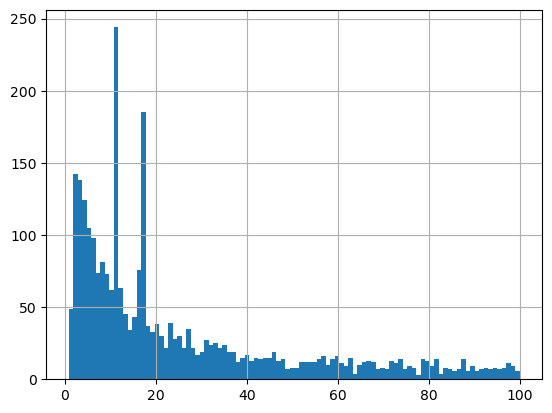

In [75]:
dataframe_simulations_compact = dataframe_simulations[dataframe_simulations["period_days"] < 100]
dataframe_simulations_compact["period_days"].hist(bins=100)
dataframe_simulations_compact["period_days"].describe()

Lets download the simulation table containing the smallest period. If a path is given, it saves the samples into the given directory.

In [76]:
min_period_index = dataframe_simulations_compact["period_days"].idxmin()
min_period_dataframe = dataframe_simulations.loc[[min_period_index]]

In [77]:
min_period_dataframe

,planet_name,star_name,run_ID,System_ID,contact_mail,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,radius_star_r_sun,...,longitude_of_ascending_node_deg,nb_planets,simulation_type,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
3204,44,Sun,NG76,179,sara.marques@unibe.ch,0.872574,0.620184,0.235516,1.0,0.900987,...,178.666105,24,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",NaN,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


In [78]:
#download_destination_path = "downloaded_simulations_samples/"
download_destination_path = None
df_list = download_samples(min_period_dataframe, download_destination_path)

In [79]:
df_list.keys()

dict_keys(['Marques_NG76_0179'])

In [81]:
df_list["Marques_NG76_0179"].head()

,time_stamp,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,...,non_surviving_inclination_deg_75,non_surviving_longitude_of_ascending_node_deg_75,non_surviving_mass_planet_star_ratio_75,non_surviving_radius_planet_star_ratio_75,non_surviving_f_ice_75,non_surviving_t_mig_75,non_surviving_t_damp_e_75,non_surviving_t_damp_i_75,non_surviving_mass_gas_disk_75,non_surviving_mass_plts_75
0,100.000000,269.294902,6828.166993,-0.000166,0.000417,0.012782,281.913558,3.073047e-08,0.000876,355.529966,...,0.014401,265.896145,3.199162e-08,0.000675,0.0,40732340.0,290553.18,416604.82,0.051597,97.240419
1,115.139540,193.498303,6828.155942,-0.000167,0.000413,0.012782,281.913117,3.083236e-08,0.000877,119.283521,...,0.014401,265.891911,3.228062e-08,0.000677,0.0,40396024.0,287954.82,412879.95,0.051595,97.219655
2,132.571137,146.290577,6828.148962,-0.000174,0.000404,0.012782,281.908860,3.094469e-08,0.000878,338.031474,...,0.014401,265.881764,3.260000e-08,0.000679,0.0,40001932.0,285129.87,408829.92,0.051593,97.198884
3,152.641797,130.223312,6828.142274,-0.000175,0.000409,0.012782,281.907714,3.106845e-08,0.000879,252.562815,...,0.014400,265.877449,3.295270e-08,0.000681,0.0,39542174.0,282089.15,404470.11,0.051591,97.178092
4,175.751062,249.031608,6828.212068,-0.000182,0.000400,0.012781,281.907285,3.124117e-08,0.000881,274.494448,...,0.014399,265.866254,3.344617e-08,0.000685,0.0,38887230.0,277942.02,398523.51,0.051587,97.152038


TODO: analysis of samples